In [14]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [15]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open('/home/nkim/checkpoints/test_output2/custom_prediction.json'))
custom_data_info = json.load(open('/home/nkim/checkpoints/test_output2/custom_data_info.json'))

In [16]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [17]:
print(len(custom_data_info['idx_to_files']))


5


In [28]:
# parameters
image_idx = 2
box_topk = 30 # select top k bounding boxes
rel_topk = 20 # select top k relationships
ind_to_classes = custom_data_info['ind_to_classes']
ind_to_predicates = custom_data_info['ind_to_predicates']

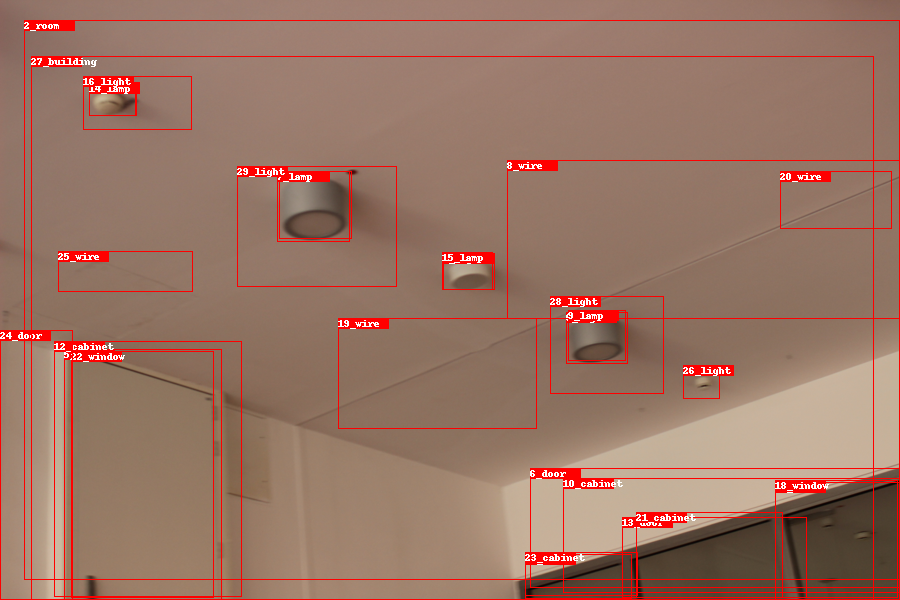

**************************************************
box_labels 0: light; score: 0.6068966388702393
box_labels 1: light; score: 0.5595892071723938
box_labels 2: room; score: 0.3806088864803314
box_labels 3: light; score: 0.34865355491638184
box_labels 4: light; score: 0.25239691138267517
box_labels 5: door; score: 0.2457113265991211
box_labels 6: door; score: 0.23952564597129822
box_labels 7: lamp; score: 0.1777220368385315
box_labels 8: wire; score: 0.10653828084468842
box_labels 9: lamp; score: 0.08265334367752075
box_labels 10: cabinet; score: 0.06732012331485748
box_labels 11: door; score: 0.0604252815246582
box_labels 12: cabinet; score: 0.05600091069936752
box_labels 13: door; score: 0.04383602738380432
box_labels 14: lamp; score: 0.036767926067113876
box_labels 15: lamp; score: 0.02349722385406494
box_labels 16: light; score: 0.021834133192896843
box_labels 17: door; score: 0.020846087485551834
box_labels 18: window; score: 0.019040046259760857
box_labels 19: wire; score: 0.012029

In [24]:
image_path = custom_data_info['idx_to_files'][image_idx]
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]

draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

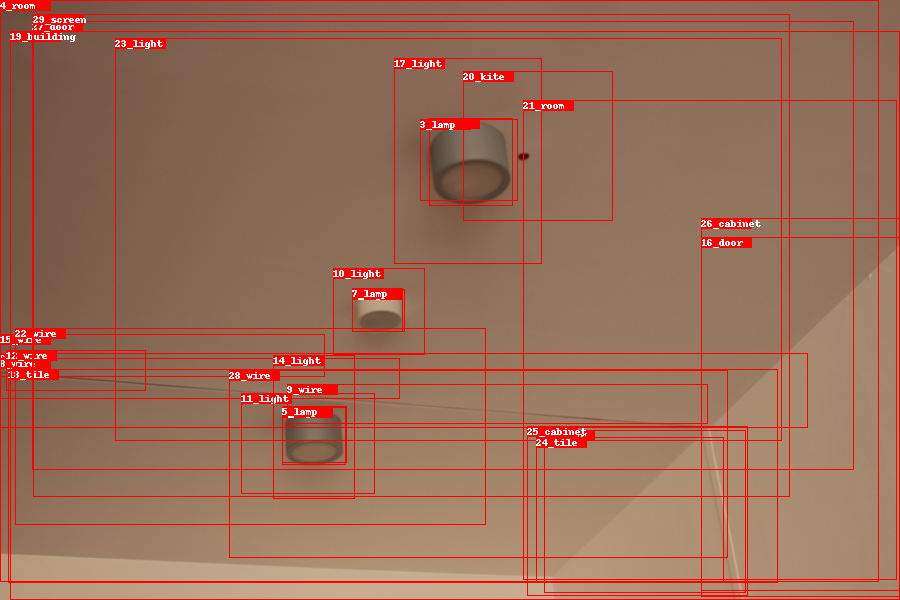

**************************************************
box_labels 0: light; score: 0.6037946939468384
box_labels 1: light; score: 0.5660041570663452
box_labels 2: light; score: 0.4589018225669861
box_labels 3: lamp; score: 0.3251367211341858
box_labels 4: room; score: 0.1632310152053833
box_labels 5: lamp; score: 0.1340271681547165
box_labels 6: wire; score: 0.06800497323274612
box_labels 7: lamp; score: 0.05389754846692085
box_labels 8: wire; score: 0.024420062080025673
box_labels 9: wire; score: 0.017304787412285805
box_labels 10: light; score: 0.011660641059279442
box_labels 11: light; score: 0.010233565233647823
box_labels 12: wire; score: 0.008915540762245655
box_labels 13: door; score: 0.008537223562598228
box_labels 14: light; score: 0.008366738446056843
box_labels 15: wire; score: 0.008250418119132519
box_labels 16: door; score: 0.007796149700880051
box_labels 17: light; score: 0.005667373072355986
box_labels 18: tile; score: 0.0033848118036985397
box_labels 19: building; score: 0.

In [27]:
image_path = custom_data_info['idx_to_files'][image_idx]
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]

draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

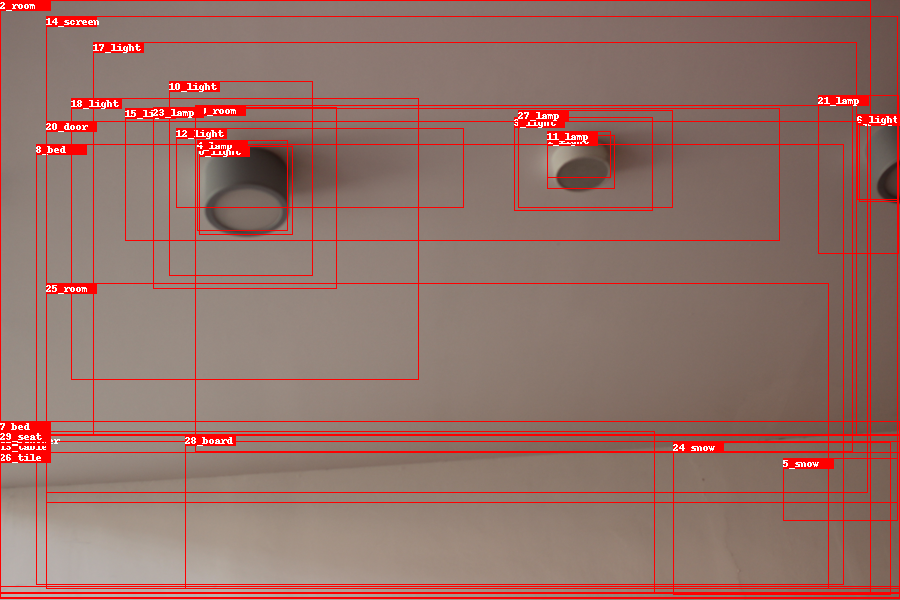

**************************************************
box_labels 0: light; score: 0.615441620349884
box_labels 1: light; score: 0.4396103024482727
box_labels 2: room; score: 0.3756181597709656
box_labels 3: lamp; score: 0.3206540644168854
box_labels 4: lamp; score: 0.19944337010383606
box_labels 5: snow; score: 0.15687328577041626
box_labels 6: light; score: 0.06632968783378601
box_labels 7: bed; score: 0.06482845544815063
box_labels 8: bed; score: 0.043905120342969894
box_labels 9: light; score: 0.021904155611991882
box_labels 10: light; score: 0.015384851023554802
box_labels 11: lamp; score: 0.012625954113900661
box_labels 12: light; score: 0.011752627789974213
box_labels 13: table; score: 0.011679352261126041
box_labels 14: screen; score: 0.009158165194094181
box_labels 15: light; score: 0.009106075391173363
box_labels 16: counter; score: 0.0069757797755301
box_labels 17: light; score: 0.006897728890180588
box_labels 18: light; score: 0.006860044319182634
box_labels 19: room; score: 0.

In [29]:
image_path = custom_data_info['idx_to_files'][image_idx]
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]

draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)